In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
import re
import ssl
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhyeydesai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dhyeydesai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dhyeydesai/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dhyeydesai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhyeydesai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/dhyeydesai/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dhy

True

In [4]:
df = pd.read_csv("../data/iphone.csv")
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [5]:
# Basic method to see unique values and their count for each column
for column in df.columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())
    print(f"Total unique values: {df[column].nunique()}")
    print("-" * 50)


Unique values in productAsin:
productAsin
B09G9D8KRQ    946
B0BN72MLT2    594
B09G9BL5CP    587
B0BDK8LKPJ    431
B0CHX1W1XY    265
B09P82T3PZ    158
B09G9J5JZX     81
Name: count, dtype: int64
Total unique values: 7
--------------------------------------------------

Unique values in country:
country
India                   2229
United States            579
Japan                    158
United Arab Emirates      80
Mexico                    11
Canada                     4
Egypt                      1
Name: count, dtype: int64
Total unique values: 7
--------------------------------------------------

Unique values in date:
date
21-07-2024    17
15-10-2023    17
12-10-2023    17
23-07-2024    16
13-11-2023    16
              ..
04-07-2023     1
30-06-2023     1
23-05-2023     1
03-12-2022     1
24-02-2022     1
Name: count, Length: 789, dtype: int64
Total unique values: 789
--------------------------------------------------

Unique values in isVerified:
isVerified
True     2850
False  

In [6]:
df = df.drop('productAsin', axis=1)
df = df.drop('date', axis=1)
df = df.drop('reviewUrl', axis=1)
df = df.drop('reviewedIn', axis=1)
df = df.drop('variantAsin', axis=1)


In [7]:
df

,country,isVerified,ratingScore,reviewTitle,reviewDescription,variant
0,India,True,4,No charger,"Every thing is good about iPhones, there's not...",Colour: MidnightSize: 256 GB
1,India,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",Colour: MidnightSize: 256 GB
2,India,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,Colour: MidnightSize: 256 GB
3,India,True,5,Product,100% genuine,Colour: MidnightSize: 256 GB
4,India,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,Colour: MidnightSize: 256 GB
...,...,...,...,...,...,...
3057,India,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,Colour: (PRODUCT) REDSize: 128 GB
3058,India,True,2,not happy with this apple product,iam not happy with this product why because ch...,Colour: (PRODUCT) REDSize: 128 GB
3059,India,True,3,Good phone,Good phone,Colour: (PRODUCT) REDSize: 128 GB
3060,India,True,1,Battery discharge,While charging mobile it's getting so hot even...,Colour: (PRODUCT) REDSize: 128 GB


In [8]:
class SentimentAnalyzer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.sia = SentimentIntensityAnalyzer()
        
    def preprocess_text(self, text):
        """Comprehensive text preprocessing"""
        if not isinstance(text, str):
            return ''
            
        # Convert to lowercase
        text = text.lower()
        
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens 
                 if token not in self.stop_words]
        
        return ' '.join(tokens)
    
    def get_detailed_sentiment(self, text):
        """Get detailed sentiment analysis using multiple methods"""
        if not isinstance(text, str):
            return {}
            
        # VADER sentiment
        vader_scores = self.sia.polarity_scores(text)
        
        # TextBlob sentiment
        blob = TextBlob(text)
        textblob_sentiment = blob.sentiment
        
        return {
            'vader_compound': vader_scores['compound'],
            'vader_pos': vader_scores['pos'],
            'vader_neg': vader_scores['neg'],
            'vader_neu': vader_scores['neu'],
            'textblob_polarity': textblob_sentiment.polarity,
            'textblob_subjectivity': textblob_sentiment.subjectivity
        }
    
    def extract_aspects(self, text):
        """Extract aspects and their associated sentiments"""
        if not isinstance(text, str):
            return {}
            
        aspects = {}
        sentences = sent_tokenize(text)
        
        for sentence in sentences:
            tokens = word_tokenize(sentence)
            tagged = pos_tag(tokens)
            
            for i, (word, tag) in enumerate(tagged):
                if tag.startswith('NN'):
                    start = max(0, i-3)
                    end = min(len(tagged), i+4)
                    context = ' '.join(token for token, _ in tagged[start:end])
                    sentiment = self.sia.polarity_scores(context)['compound']
                    aspects[word] = sentiment
                    
        return aspects

In [9]:
def analyze_reviews(df):
    """Perform comprehensive review analysis"""
    analyzer = SentimentAnalyzer()
    
    print("Combining text columns...")
    df['full_review'] = (
        df['reviewTitle'].fillna('') + ' ' + 
        df['reviewDescription'].fillna('') + ' ' + 
        df['variant'].fillna('')
    )
    
    print("Preprocessing text...")
    df['processed_text'] = df['full_review'].apply(analyzer.preprocess_text)
    
    print("Analyzing sentiment...")
    sentiment_scores = df['full_review'].apply(analyzer.get_detailed_sentiment)
    sentiment_df = pd.DataFrame(sentiment_scores.tolist())
    df = pd.concat([df, sentiment_df], axis=1)
    
    print("Extracting aspects...")
    df['aspects'] = df['full_review'].apply(analyzer.extract_aspects)
    
    # Create sentiment categories
    df['sentiment_category'] = pd.cut(
        df['vader_compound'],
        bins=[-1, -0.1, 0.1, 1],
        labels=['Negative', 'Neutral', 'Positive']
    )
    
    return df

In [10]:
def create_visualizations(df):
    """Create comprehensive visualizations"""
    # Plot 1: Sentiment Distribution
    plt.figure(figsize=(12, 6))
    sentiment_counts = df['sentiment_category'].value_counts()
    plt.bar(sentiment_counts.index, sentiment_counts.values)
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    
    # Add value labels on top of bars
    for i, v in enumerate(sentiment_counts.values):
        plt.text(i, v + 30, str(v), ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Sentiment Components
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # VADER components
    vader_means = df[['vader_pos', 'vader_neg', 'vader_neu']].mean()
    vader_means.plot(kind='bar', ax=ax1)
    ax1.set_title('Average VADER Sentiment Components')
    ax1.set_xlabel('Component')
    ax1.set_ylabel('Score')
    
    # TextBlob components
    sns.scatterplot(
        data=df,
        x='textblob_polarity',
        y='textblob_subjectivity',
        hue='sentiment_category',
        alpha=0.6,
        ax=ax2
    )
    ax2.set_title('Sentiment Polarity vs Subjectivity')
    
    plt.tight_layout()
    plt.show()
    
    # Plot 3: Class Imbalance
    plt.figure(figsize=(10, 6))
    class_proportions = df['sentiment_category'].value_counts(normalize=True) * 100
    plt.pie(class_proportions, labels=class_proportions.index, autopct='%1.1f%%')
    plt.title('Sentiment Class Distribution')
    plt.axis('equal')
    plt.show()

In [11]:
class SentimentClassifier:
    def __init__(self, df, text_column='processed_text', target_column='sentiment_category',
                 test_size=0.25, val_size=0.25, balance_method='smote'):
        self.df = df
        self.text_column = text_column
        self.target_column = target_column
        self.test_size = test_size
        self.val_size = val_size
        self.balance_method = balance_method
        self.models = {}
        self.results = {}
    
    def prepare_data(self):
        """Prepare data for ML models with explicit train/validation/test splits"""
        # Convert sentiment categories to numeric values
        sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
        self.df['sentiment_numeric'] = self.df[self.target_column].map(sentiment_map)
        
        # First split: separate test set
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            self.df[self.text_column],
            self.df['sentiment_numeric'],
            test_size=self.test_size,
            random_state=42,
            stratify=self.df['sentiment_numeric']
        )
        
        # Second split: separate train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val,
            y_train_val,
            test_size=self.val_size,
            random_state=42,
            stratify=y_train_val
        )
        
        # Store indices for later use
        self.val_indices = X_val.index
        self.test_indices = X_test.index
        
        # Compute class weights
        self.class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(y_train),
            y=y_train
        )
        self.class_weight_dict = dict(zip(np.unique(y_train), self.class_weights))
        
        # Print split sizes and class distribution
        print("\nData split sizes:")
        print(f"Training set: {len(X_train)} samples ({len(X_train)/len(self.df):.1%})")
        print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(self.df):.1%})")
        print(f"Test set: {len(X_test)} samples ({len(X_test)/len(self.df):.1%})")
        
        print("\nClass distribution:")
        print("Training set:", pd.Series(y_train).value_counts(normalize=True).round(3))
        print("Validation set:", pd.Series(y_val).value_counts(normalize=True).round(3))
        print("Test set:", pd.Series(y_test).value_counts(normalize=True).round(3))
        
        print("\nClass weights:")
        for class_label, weight in self.class_weight_dict.items():
            print(f"Class {class_label}: {weight:.2f}")
        
        return X_train, X_val, X_test, y_train, y_val, y_test
    
    def create_models(self):
        """Create pipeline for different models with class balancing"""
        if self.balance_method == 'smote':
            return {
                'Logistic Regression': ImbPipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('smote', SMOTE(random_state=42)),
                    ('classifier', LogisticRegression(max_iter=1000))
                ]),
                'Random Forest': ImbPipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('smote', SMOTE(random_state=42)),
                    ('classifier', RandomForestClassifier())
                ]),
                'XGBoost': ImbPipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('smote', SMOTE(random_state=42)),
                    ('classifier', XGBClassifier(
                        objective='multi:softprob',
                        num_class=3
                    ))
                ]),
                'Naive Bayes': ImbPipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('smote', SMOTE(random_state=42)),
                    ('classifier', MultinomialNB())
                ])
            }
        else:  # class_weight
            return {
                'Logistic Regression': Pipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('classifier', LogisticRegression(
                        max_iter=1000,
                        class_weight=self.class_weight_dict
                    ))
                ]),
                'Random Forest': Pipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('classifier', RandomForestClassifier(
                        class_weight=self.class_weight_dict
                    ))
                ]),
                'XGBoost': Pipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('classifier', XGBClassifier(
                        objective='multi:softprob',
                        num_class=3,
                        scale_pos_weight=self.class_weights[1]/self.class_weights[0]
                    ))
                ]),
                'Naive Bayes': Pipeline([
                    ('tfidf', TfidfVectorizer(max_features=5000)),
                    ('classifier', MultinomialNB())
                ])
            }
    
    def evaluate_class_metrics(self, y_true, y_pred, set_name=""):
        """Evaluate metrics for each class"""
        report = classification_report(y_true, y_pred, output_dict=True)
        
        print(f"\nDetailed {set_name} metrics:")
        for label in ['0', '1', '2']:  # Negative, Neutral, Positive
            metrics = report[label]
            print(f"\nClass {label}:")
            print(f"Precision: {metrics['precision']:.3f}")
            print(f"Recall: {metrics['recall']:.3f}")
            print(f"F1-score: {metrics['f1-score']:.3f}")
            print(f"Support: {metrics['support']}")
    
    def train_and_evaluate(self):
        """Train and evaluate all models with balanced metrics"""
        X_train, X_val, X_test, y_train, y_val, y_test = self.prepare_data()
        self.models = self.create_models()
        
        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            
            model.fit(X_train, y_train)
            val_pred = model.predict(X_val)
            test_pred = model.predict(X_test)
            
            self.results[name] = {
                'val_predictions': val_pred,
                'test_predictions': test_pred,
                'val_report': classification_report(y_val, val_pred),
                'test_report': classification_report(y_test, test_pred),
                'val_confusion_matrix': confusion_matrix(y_val, val_pred),
                'test_confusion_matrix': confusion_matrix(y_test, test_pred),
                'cross_val_scores': cross_val_score(model, X_train, y_train, cv=5)
            }
            
            print(f"\nResults for {name}:")
            self.evaluate_class_metrics(y_val, val_pred, "Validation")
            self.evaluate_class_metrics(y_test, test_pred, "Test")
            print(f"\nCross-validation scores: {np.mean(self.results[name]['cross_val_scores']):.3f} (+/- {np.std(self.results[name]['cross_val_scores'])*2:.3f})")
    
    def predict_sentiment(self, text):
        """Predict sentiment for new reviews using the best model"""
        sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
        
        # Get best model based on cross-validation scores
        model_names = list(self.results.keys())
        cv_means = [np.mean(self.results[name]['cross_val_scores']) for name in model_names]
        best_model = model_names[np.argmax(cv_means)]
        model = self.models[best_model]
        
        # Preprocess the text
        processed_text = SentimentAnalyzer().preprocess_text(text)
        
        # Predict
        prediction = model.predict([processed_text])[0]
        probabilities = model.predict_proba([processed_text])[0]
        
        result = {
            'sentiment': sentiment_map[prediction],
            'probabilities': {
                'Negative': probabilities[0],
                'Neutral': probabilities[1],
                'Positive': probabilities[2]
            },
            'model_used': best_model
        }
        
        return result
    
    def plot_results(self):
        """Plot comparison of model performances"""
        # Plot 1: Model Performance Comparison
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        model_names = list(self.results.keys())
        cv_means = [np.mean(self.results[name]['cross_val_scores']) for name in model_names]
        cv_stds = [np.std(self.results[name]['cross_val_scores']) for name in model_names]
        
        ax1.bar(model_names, cv_means, yerr=cv_stds)
        ax1.set_title('Model Performance Comparison')
        ax1.set_xlabel('Model')
        ax1.set_ylabel('Cross-validation Score')
        for tick in ax1.get_xticklabels():
            tick.set_rotation(45)
        
        # Plot 2: Confusion Matrix for best model
        best_model = model_names[np.argmax(cv_means)]
        sns.heatmap(
            self.results[best_model]['test_confusion_matrix'],
            annot=True,
            fmt='d',
            cmap='Blues',
            ax=ax2
        )
        ax2.set_title(f'Test Set Confusion Matrix - {best_model}')
        
        plt.tight_layout()
        plt.show()
        
        # Additional plot: Per-class performance
        plt.figure(figsize=(12, 6))
        class_f1_scores = {}
        
        for name in model_names:
            test_report = classification_report(
                self.df['sentiment_numeric'].iloc[self.test_indices],
                self.results[name]['test_predictions'],
                output_dict=True
            )
            class_f1_scores[name] = [
                test_report['0']['f1-score'],
                test_report['1']['f1-score'],
                test_report['2']['f1-score']
            ]
        
        # Plot per-class F1 scores
        labels = ['Negative', 'Neutral', 'Positive']
        x = np.arange(len(labels))
        width = 0.8 / len(model_names)
        
        for i, (name, scores) in enumerate(class_f1_scores.items()):
            plt.bar(x + i * width, scores, width, label=name)
        
        plt.ylabel('F1 Score')
        plt.title('Per-class Performance Comparison')
        plt.xticks(x + width * (len(model_names) - 1) / 2, labels)
        plt.legend()
        plt.tight_layout()
        plt.show()

Loading data...
Preprocessing data...

Missing values in dataset:
reviewDescription    86
dtype: int64

Handling missing values...

Initial dataset statistics:
Total number of reviews: 3062

Columns in dataset:
- country
- isVerified
- ratingScore
- reviewTitle
- reviewDescription
- variant

Starting sentiment analysis...
Combining text columns...
Preprocessing text...
Analyzing sentiment...
Extracting aspects...

Sentiment distribution:
Positive: 2128 (69.5%)
Negative: 628 (20.5%)
Neutral: 306 (10.0%)

Creating data distribution visualizations...


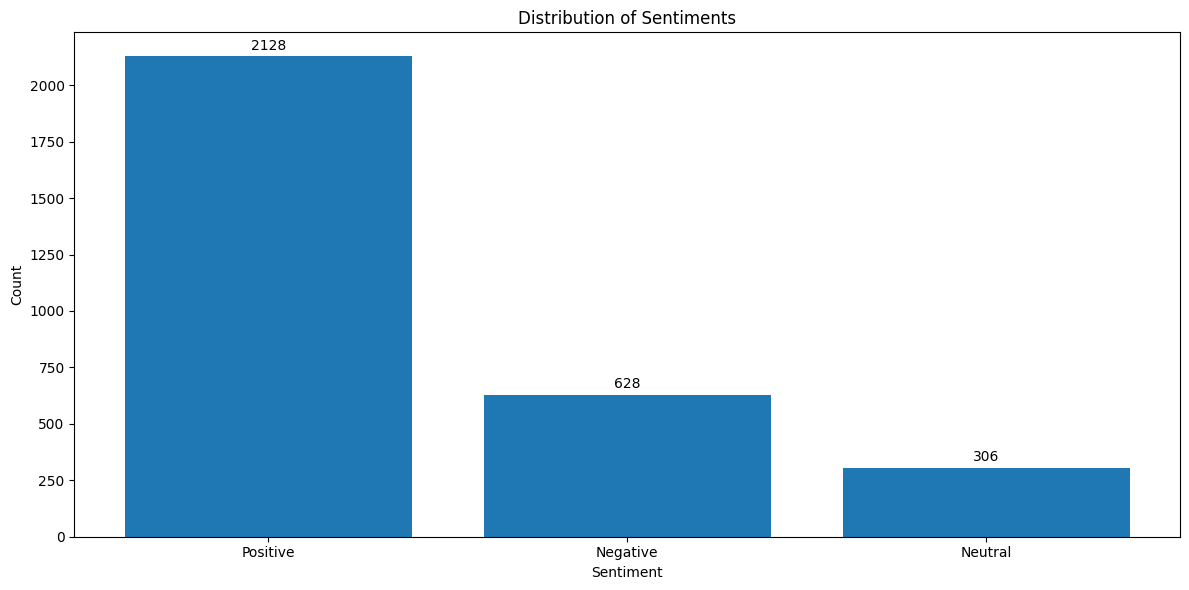

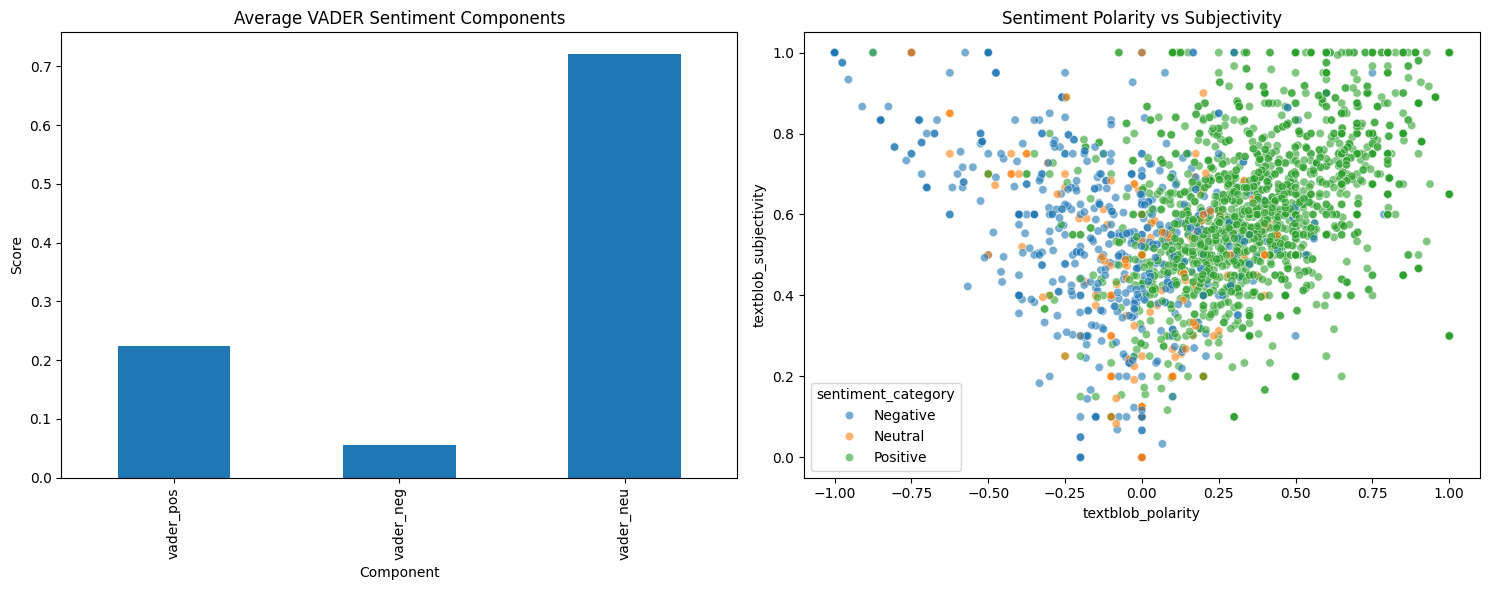

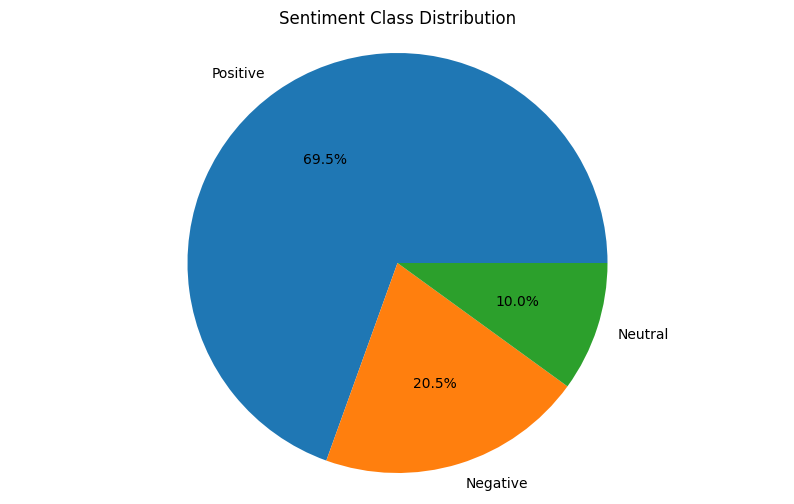


Starting ML model training...
Using SMOTE for handling class imbalance...

Data split sizes:
Training set: 1959 samples (64.0%)
Validation set: 490 samples (16.0%)
Test set: 613 samples (20.0%)

Class distribution:
Training set: sentiment_numeric
2    0.695
0    0.205
1    0.100
Name: proportion, dtype: float64
Validation set: sentiment_numeric
2    0.696
0    0.204
1    0.100
Name: proportion, dtype: float64
Test set: sentiment_numeric
2    0.695
0    0.206
1    0.100
Name: proportion, dtype: float64

Class weights:
Class 0: 1.62
Class 1: 3.33
Class 2: 0.48

Training Logistic Regression...

Results for Logistic Regression:

Detailed Validation metrics:

Class 0:
Precision: 0.642
Recall: 0.610
F1-score: 0.626
Support: 100.0

Class 1:
Precision: 0.491
Recall: 0.551
F1-score: 0.519
Support: 49.0

Class 2:
Precision: 0.906
Recall: 0.903
F1-score: 0.905
Support: 341.0

Detailed Test metrics:

Class 0:
Precision: 0.690
Recall: 0.706
F1-score: 0.698
Support: 126.0

Class 1:
Precision: 0.461

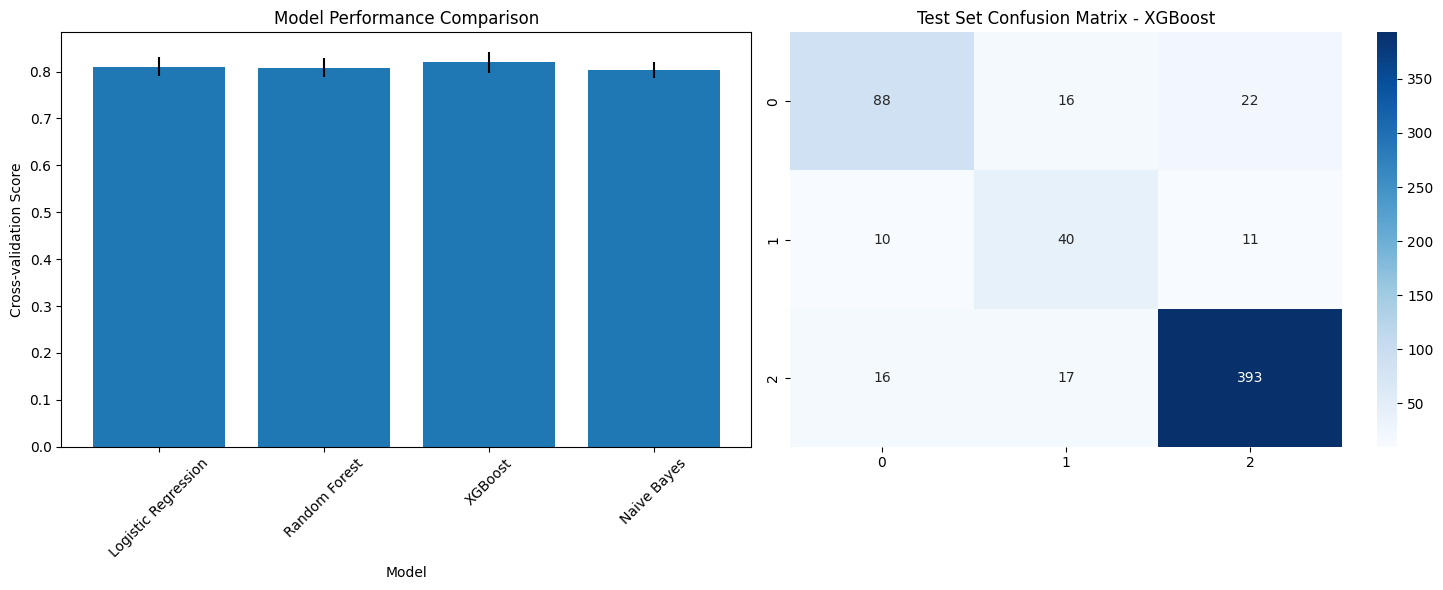

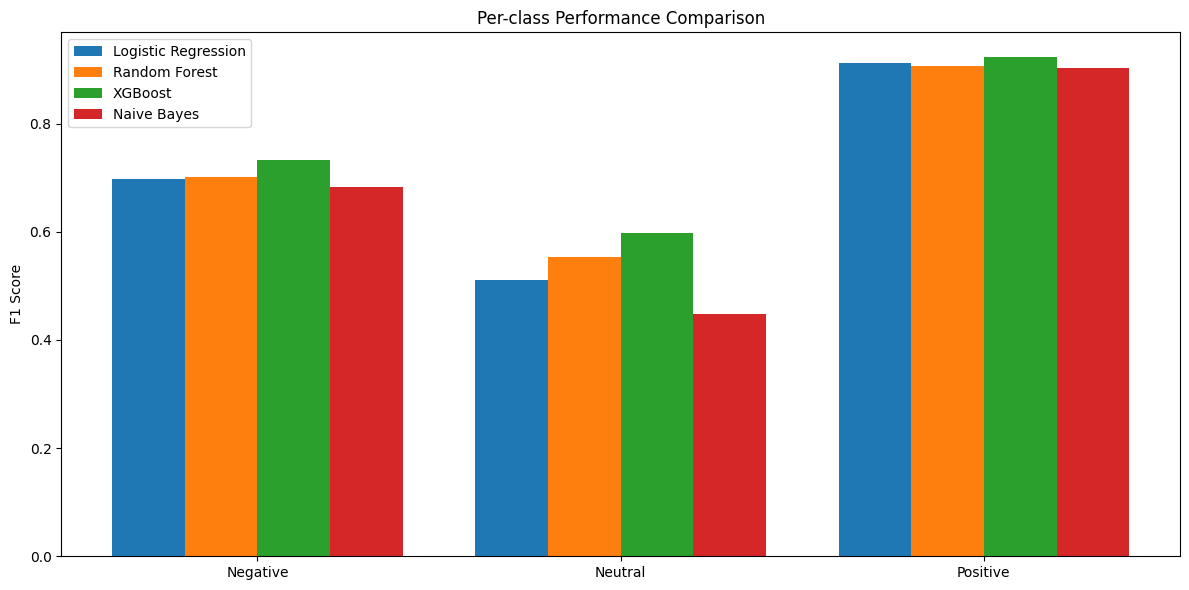


Testing model with example reviews...

Example predictions:

Text: 'Amazing phone, great camera quality and battery life'
Predicted sentiment: Positive
Confidence scores:
  Negative: 0.002
  Neutral: 0.004
  Positive: 0.994
Model used: XGBoost

Text: 'Worst purchase ever, totally disappointed'
Predicted sentiment: Negative
Confidence scores:
  Negative: 0.985
  Neutral: 0.008
  Positive: 0.007
Model used: XGBoost

Text: 'It's an okay phone, nothing special'
Predicted sentiment: Positive
Confidence scores:
  Negative: 0.153
  Neutral: 0.186
  Positive: 0.661
Model used: XGBoost

Text: 'The battery life could be better but overall good phone'
Predicted sentiment: Positive
Confidence scores:
  Negative: 0.009
  Neutral: 0.001
  Positive: 0.991
Model used: XGBoost

Text: 'Camera quality is excellent but price is too high'
Predicted sentiment: Positive
Confidence scores:
  Negative: 0.030
  Neutral: 0.017
  Positive: 0.953
Model used: XGBoost

Text: 'Very disappointed with the product qual

In [12]:
# Main execution
if __name__ == "__main__":
    # Start timing execution
    import time
    start_time = time.time()
    
    # Load data
    print("Loading data...")
    try:
        df = pd.read_csv("../data/iphone.csv")
    except FileNotFoundError:
        print("Error: Data file not found. Please check the file path.")
        exit(1)
    
    # Drop unnecessary columns
    print("Preprocessing data...")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("\nMissing values in dataset:")
        print(missing_values[missing_values > 0])
        print("\nHandling missing values...")
        df = df.fillna('')
    
    # Print initial dataset statistics
    print("\nInitial dataset statistics:")
    print(f"Total number of reviews: {len(df)}")
    print("\nColumns in dataset:")
    for col in df.columns:
        print(f"- {col}")
    
    # Perform sentiment analysis
    print("\nStarting sentiment analysis...")
    processed_df = analyze_reviews(df)
    
    # Display sentiment distribution
    sentiment_dist = processed_df['sentiment_category'].value_counts()
    print("\nSentiment distribution:")
    for sentiment, count in sentiment_dist.items():
        print(f"{sentiment}: {count} ({count/len(processed_df)*100:.1f}%)")
    
    # Create visualizations
    print("\nCreating data distribution visualizations...")
    create_visualizations(processed_df)
    
    # Train and evaluate models
    print("\nStarting ML model training...")
    print("Using SMOTE for handling class imbalance...")
    
    # Initialize classifier with SMOTE
    classifier = SentimentClassifier(
        processed_df,
        test_size=0.2,
        val_size=0.2,
        balance_method='smote'
    )
    
    # Train and evaluate models
    try:
        classifier.train_and_evaluate()
        classifier.plot_results()
    except Exception as e:
        print(f"Error during model training: {str(e)}")
        exit(1)
    
    # Example predictions
    print("\nTesting model with example reviews...")
    example_texts = [
        "Amazing phone, great camera quality and battery life",
        "Worst purchase ever, totally disappointed",
        "It's an okay phone, nothing special",
        "The battery life could be better but overall good phone",
        "Camera quality is excellent but price is too high",
        "Very disappointed with the product quality",
        "Average performance, not worth the premium price",
        "Fantastic features and incredible user experience",
        "The phone keeps freezing and battery drains quickly",
        "Good value for money, meets all basic requirements"
    ]
    
    print("\nExample predictions:")
    for text in example_texts:
        try:
            result = classifier.predict_sentiment(text)
            print(f"\nText: '{text}'")
            print(f"Predicted sentiment: {result['sentiment']}")
            print("Confidence scores:")
            for sentiment, prob in result['probabilities'].items():
                print(f"  {sentiment}: {prob:.3f}")
            print(f"Model used: {result['model_used']}")
        except Exception as e:
            print(f"Error predicting sentiment for text: '{text}'")
            print(f"Error message: {str(e)}")
    
    # Save results
    print("\nSaving results...")
    try:
        # Save processed dataset
        processed_df.to_csv('processed_reviews.csv', index=False)
        print("Processed data saved to 'processed_reviews.csv'")
        
        # Save model performance metrics
        performance_metrics = {
            model_name: {
                'validation_f1': classification_report(
                    y_true=processed_df['sentiment_numeric'].iloc[classifier.val_indices],
                    y_pred=classifier.results[model_name]['val_predictions'],
                    output_dict=True
                )['weighted avg']['f1-score'],
                'test_f1': classification_report(
                    y_true=processed_df['sentiment_numeric'].iloc[classifier.test_indices],
                    y_pred=classifier.results[model_name]['test_predictions'],
                    output_dict=True
                )['weighted avg']['f1-score'],
                'cross_val_mean': np.mean(classifier.results[model_name]['cross_val_scores']),
                'cross_val_std': np.std(classifier.results[model_name]['cross_val_scores'])
            }
            for model_name in classifier.results.keys()
        }
        
        # Convert performance metrics to DataFrame and save
        performance_df = pd.DataFrame(performance_metrics).transpose()
        performance_df.to_csv('model_performance.csv')
        print("Model performance metrics saved to 'model_performance.csv'")
        
        # Save detailed results
        detailed_results = pd.DataFrame({
            'Text': example_texts,
            'Predicted_Sentiment': [classifier.predict_sentiment(text)['sentiment'] for text in example_texts],
            'Confidence': [max(classifier.predict_sentiment(text)['probabilities'].values()) for text in example_texts]
        })
        detailed_results.to_csv('prediction_examples.csv', index=False)
        print("Example predictions saved to 'prediction_examples.csv'")
        
    except Exception as e:
        print(f"Error saving results: {str(e)}")
    
    # Print final summary
    print("\nAnalysis Complete!")
    print(f"Best performing model: {max(performance_metrics.items(), key=lambda x: x[1]['test_f1'])[0]}")
    
    # Print model comparison
    print("\nModel Performance Summary:")
    print(performance_df.round(3))
    
    # Print execution time
    print(f"\nTotal execution time: {time.time() - start_time:.2f} seconds")

In [13]:
# Function to make predictions on new text
def predict_new_text(classifier, text):
    """
    Utility function to make predictions on new text
    """
    try:
        result = classifier.predict_sentiment(text)
        print(f"\nText: '{text}'")
        print(f"Predicted sentiment: {result['sentiment']}")
        print("Confidence scores:")
        for sentiment, prob in result['probabilities'].items():
            print(f"  {sentiment}: {prob:.3f}")
        return result
    except Exception as e:
        print(f"Error predicting sentiment: {str(e)}")
        return None

# Example of how to use the trained classifier for new predictions
def test_new_predictions(classifier):
    print("\nMaking predictions on new text:")
    new_texts = [
        "This is the best phone I've ever had",
        "The product quality is terrible",
        "It's a decent phone for the price"
    ]
    
    for text in new_texts:
        predict_new_text(classifier, text)

# Add this if you want to run new predictions
if __name__ == "__main__":
    test_new_predictions(classifier)


Making predictions on new text:

Text: 'This is the best phone I've ever had'
Predicted sentiment: Positive
Confidence scores:
  Negative: 0.008
  Neutral: 0.011
  Positive: 0.980

Text: 'The product quality is terrible'
Predicted sentiment: Positive
Confidence scores:
  Negative: 0.224
  Neutral: 0.272
  Positive: 0.505

Text: 'It's a decent phone for the price'
Predicted sentiment: Positive
Confidence scores:
  Negative: 0.277
  Neutral: 0.338
  Positive: 0.384
